<a href="https://colab.research.google.com/github/racso339/racso339-Challenge_TelecomX_Alura/blob/master/Alura_Challenge_Telecom_X_v3_refinado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📑Extracción de datos

## Subir y extraer datos del archivo JSON

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
datos_clientes = pd.read_json('/content/drive/MyDrive/dsllo psnal/Alura - ORACLE/CHALLENGES/02 Telecom X part 1/TelecomX_Data.json')

In [4]:
datos_clientes.sample(5)

,customerID,Churn,customer,phone,internet,account
867,1226-IENZN,No,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
6911,9522-ZSINC,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'One year', 'PaperlessBilling': '..."
4398,6023-GSSXW,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."
1663,2361-FJWNO,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'No', 'MultipleLines': 'No ph...","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
6716,9249-FXSCK,Yes,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'One year', 'PaperlessBilling': '..."


In [5]:
datos_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


# ➡️Transformación de los datos

## Creando columnas de ID y Churn

In [6]:
data_clients = datos_clientes[['customerID', 'Churn']]

In [7]:
data_clients.to_json('data_telecom.json')

In [8]:
datos = pd.read_json('data_telecom.json')

In [9]:
datos['customerID'] = datos['customerID'].astype('string').str.lower()

In [10]:
datos['Churn'] = datos['Churn'].astype(str).str.lower()
datos['Churn'] = datos['Churn'].replace({'yes': True, 'no': False}).astype(bool)

In [11]:
datos.head()

,customerID,Churn
0,0002-orfbo,False
1,0003-mknfe,False
2,0004-tlhlj,True
3,0011-igkff,True
4,0013-exchz,True


In [12]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   string
 1   Churn       7267 non-null   bool  
dtypes: bool(1), string(1)
memory usage: 120.6 KB


In [13]:
datos.to_json('data_telecom_dtype.json')

## Normalizando archivo JSON

In [14]:
df_normalizado_customer = pd.json_normalize(datos_clientes['customer'])
df_normalizado_phone = pd.json_normalize(datos_clientes['phone'])
df_normalizado_internet = pd.json_normalize(datos_clientes['internet'])
df_normalizado_account = pd.json_normalize(datos_clientes['account'])

In [15]:
df_normalizado_account.sample(5)

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
2785,Month-to-month,Yes,Electronic check,64.65,3735.45
2967,Month-to-month,Yes,Credit card (automatic),74.25,639.65
2554,Month-to-month,No,Bank transfer (automatic),45.90,505.95
3609,Month-to-month,Yes,Credit card (automatic),34.30,577.15
4510,Month-to-month,Yes,Electronic check,78.30,909.25


## Guardando los archivos normalizados JSON

In [16]:
df_normalizado_account.to_json('account_telecom.json')
df_normalizado_customer.to_json('customer_telecom.json')
df_normalizado_phone.to_json('phone_telecom.json')
df_normalizado_internet.to_json('internet_telecom.json')

## Trabajando y transformando los DataFrames

In [17]:
import numpy as np

### Archivo: account_telecom.json

In [18]:
cuentas = pd.read_json('account_telecom.json')

In [19]:
cuentas['Charges.Total'] = cuentas['Charges.Total'].astype(str).str.replace(',', '', regex=False)
cuentas['Charges.Total'] = cuentas['Charges.Total'].str.strip()
cuentas['Charges.Total'] = pd.to_numeric(cuentas['Charges.Total'], errors='coerce')
cuentas['Charges.Total'] = cuentas['Charges.Total'].astype(np.float64)

In [20]:
cuentas['PaperlessBilling'] = (
    cuentas['PaperlessBilling']
    .astype(str)
    .str.lower()
    .map({'yes': True, 'no': False})
    .astype(bool) )


In [21]:
cuentas['PaymentMethod'] = cuentas['PaymentMethod'].astype('string').str.lower()

In [22]:
cuentas['Contract'] = cuentas['Contract'].astype('string').str.lower()

In [23]:
cuentas.sample(5)

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
5599,two year,False,mailed check,19.85,NaN
195,month-to-month,True,electronic check,96.10,453.40
2872,one year,True,credit card (automatic),20.35,695.85
660,month-to-month,True,electronic check,100.25,3527.60
1073,two year,False,credit card (automatic),73.85,3371.00


In [24]:
cuentas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   string 
 1   PaperlessBilling  7267 non-null   bool   
 2   PaymentMethod     7267 non-null   string 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7256 non-null   float64
dtypes: bool(1), float64(2), string(2)
memory usage: 291.0 KB


In [25]:
cuentas.to_json('account_telecom_dtype.json')

### Archivo: customer_telecom.json

In [26]:
clientes = pd.read_json('customer_telecom.json')

In [28]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7267 non-null   string
 1   SeniorCitizen  7267 non-null   int64 
 2   Partner        7267 non-null   object
 3   Dependents     7267 non-null   object
 4   tenure         7267 non-null   int64 
dtypes: int64(2), object(2), string(1)
memory usage: 340.6+ KB


In [27]:
clientes['gender'] = clientes['gender'].astype('string').str.lower()

In [29]:
clientes['Partner'] = (
    clientes['Partner']
    .astype(str)
    .str.lower()
    .map({'yes': True, 'no': False})
    .astype(bool)   )


In [31]:
clientes['Dependents'] = (
    clientes['Dependents']
    .astype(str)
    .str.lower()
    .map({'yes': True, 'no': False})
    .astype(bool)   )


In [32]:
clientes.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure
1321,male,1,False,False,10
5741,female,0,False,False,23
1926,male,0,False,False,64
369,male,0,False,True,70
1320,female,0,False,False,1


In [33]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7267 non-null   string
 1   SeniorCitizen  7267 non-null   int64 
 2   Partner        7267 non-null   bool  
 3   Dependents     7267 non-null   bool  
 4   tenure         7267 non-null   int64 
dtypes: bool(2), int64(2), string(1)
memory usage: 241.3 KB


In [34]:
clientes.to_json('customer_telecom_dtype.json')

### Archivo: phone_telecom.json

In [37]:
def yes_no_to_bool(df, column):
    """
    Convierte una columna con valores 'yes'/'no' (ignora mayúsculas/minúsculas)
    en valores booleanos True/False.

    Parámetros:
        df (pd.DataFrame): DataFrame donde está la columna.
        column (str): Nombre de la columna a transformar.

    Retorna:
        pd.DataFrame con la columna transformada.
    """
    df[column] = (
        df[column]
        .astype(str)
        .str.lower()
        .map({'yes': True, 'no': False})
        .astype(bool)
    )
    return df

In [35]:
telefono = pd.read_json('phone_telecom.json')

In [42]:
telefono = yes_no_to_bool(telefono, 'PhoneService')
telefono = yes_no_to_bool(telefono, 'MultipleLines')

In [45]:
telefono.sample(5)

,PhoneService,MultipleLines
3686,True,False
4330,True,True
3455,True,True
885,True,False
389,True,True


In [46]:
telefono.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   PhoneService   7267 non-null   bool 
 1   MultipleLines  7267 non-null   bool 
dtypes: bool(2)
memory usage: 71.0 KB


In [47]:
telefono.to_json('phone_telecom_dtype.json')

### Archivo: internet_telecom.json

In [48]:
internet = pd.read_json('internet_telecom.json')

In [49]:
internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [50]:
internet['InternetService'] = internet['InternetService'].astype('string').str.lower()

In [51]:
internet = yes_no_to_bool(internet, 'OnlineSecurity')
internet = yes_no_to_bool(internet, 'OnlineBackup')
internet = yes_no_to_bool(internet, 'DeviceProtection')
internet = yes_no_to_bool(internet, 'TechSupport')
internet = yes_no_to_bool(internet, 'StreamingTV')
internet = yes_no_to_bool(internet, 'StreamingMovies')

In [52]:
internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,dsl,False,True,False,True,True,False
1,dsl,False,False,False,False,False,True
2,fiber optic,False,False,True,False,False,False
3,fiber optic,False,True,True,False,True,True
4,fiber optic,False,False,False,True,True,False


In [53]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   7267 non-null   string
 1   OnlineSecurity    7267 non-null   bool  
 2   OnlineBackup      7267 non-null   bool  
 3   DeviceProtection  7267 non-null   bool  
 4   TechSupport       7267 non-null   bool  
 5   StreamingTV       7267 non-null   bool  
 6   StreamingMovies   7267 non-null   bool  
dtypes: bool(6), string(1)
memory usage: 156.1 KB


In [54]:
internet.to_json('internet_telecom_dtype.json')

# 🧮Analisis de los datos y manejo de inconsistencias

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

## Trabajando con "data_telecom_dtype.json"

### Explorando el DataFrame

In [56]:
data_id_telecom = pd.read_json('data_telecom_dtype.json')

In [57]:
data_id_telecom['customerID'] = data_id_telecom['customerID'].astype('string').str.lower()

In [58]:
# 1. Generando las primeras 5 filas
data_id_telecom.head()

,customerID,Churn
0,0002-orfbo,False
1,0003-mknfe,False
2,0004-tlhlj,True
3,0011-igkff,True
4,0013-exchz,True


In [59]:
# 2. La info de que tipo de datos es el Data Frame
data_id_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   string
 1   Churn       7267 non-null   bool  
dtypes: bool(1), string(1)
memory usage: 120.6 KB


In [60]:
# 3. Obteniendo el numero de filas y columnas
data_id_telecom.shape

(7267, 2)

In [61]:
# 4. Generar estadísticas descriptivas para todas las columnas, incluidas las no numéricas
data_id_telecom.describe(include = 'all')

,customerID,Churn
count,7267,7267
unique,7267,2
top,0011-igkff,False
freq,1,5398


## Analizando "account_telecom_dtype.json"

### Explorando el DataFrame

In [62]:
cuentas_telecom = pd.read_json('account_telecom_dtype.json')

In [63]:
cuentas_telecom['Contract'] = cuentas_telecom['Contract'].astype('string').str.lower()
cuentas_telecom['PaymentMethod'] = cuentas_telecom['PaymentMethod'].astype('string').str.lower()

In [64]:
# 1. Mostrando las primeras filas del Data Frame
cuentas_telecom.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,one year,True,mailed check,65.6,593.30
1,month-to-month,False,mailed check,59.9,542.40
2,month-to-month,True,electronic check,73.9,280.85
3,month-to-month,True,electronic check,98.0,1237.85
4,month-to-month,True,mailed check,83.9,267.40


In [65]:
# 2. Información general del Data Frame
cuentas_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   string 
 1   PaperlessBilling  7267 non-null   bool   
 2   PaymentMethod     7267 non-null   string 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7256 non-null   float64
dtypes: bool(1), float64(2), string(2)
memory usage: 291.0 KB


In [66]:
# 3. El total de filas y columnas
cuentas_telecom.shape

(7267, 5)

In [67]:
# 3. Resumen estadistico de las columnas
cuentas_telecom.describe()

,Charges.Monthly,Charges.Total
count,7267.000000,7256.000000
mean,64.720098,2280.634213
std,30.129572,2268.632997
min,18.250000,18.800000
25%,35.425000,400.225000
50%,70.300000,1391.000000
75%,89.875000,3785.300000
max,118.750000,8684.800000


In [68]:
# 3.1. Resumen estadistico mas descriptivo de las columnas
cuentas_telecom.describe(include = 'all')

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
count,7267,7267,7267,7267.000000,7256.000000
unique,3,2,4,NaN,NaN
top,month-to-month,True,electronic check,NaN,NaN
freq,4005,4311,2445,NaN,NaN
mean,NaN,NaN,NaN,64.720098,2280.634213
std,NaN,NaN,NaN,30.129572,2268.632997
min,NaN,NaN,NaN,18.250000,18.800000
25%,NaN,NaN,NaN,35.425000,400.225000
50%,NaN,NaN,NaN,70.300000,1391.000000
75%,NaN,NaN,NaN,89.875000,3785.300000


In [69]:
# 4. Verificar si hay datos nulos
cuentas_telecom.isnull().sum()

,0
Contract,0
PaperlessBilling,0
PaymentMethod,0
Charges.Monthly,0
Charges.Total,11


### Adicionalmente evaluando las columnas por valores unicos (Strings y Booleans)

In [70]:
# 4. Verificar valores unicos y contar la frecuencia en cada columna
cuentas_telecom['Contract'].value_counts()

,count
Contract,
month-to-month,4005
two year,1743
one year,1519


In [71]:
cuentas_telecom['PaperlessBilling'].value_counts()

,count
PaperlessBilling,
True,4311
False,2956


In [72]:
cuentas_telecom['PaymentMethod'].value_counts()

,count
PaymentMethod,
electronic check,2445
mailed check,1665
bank transfer (automatic),1589
credit card (automatic),1568


### La misma evaluacion para las columnas numericas (Float)

In [73]:
cuentas_telecom['Charges.Monthly'].value_counts()

,count
Charges.Monthly,
20.05,65
19.90,46
19.85,46
19.55,45
19.70,45
...,...
87.90,1
87.60,1
52.20,1


In [74]:
cuentas_telecom['Charges.Total'].value_counts()

,count
Charges.Total,
20.20,11
19.75,9
19.90,9
19.55,9
20.05,8
...,...
7261.25,1
6849.40,1
1993.20,1


## Unificando a un solo DataFrame para analisis mas profundo

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
file_path_data_id = 'data_telecom_dtype.json'
file_path_cuentas = 'account_telecom_dtype.json'

In [77]:
try:
    df_clientes_telecom = pd.read_json(file_path_data_id)
    df_cuentas_telecom = pd.read_json(file_path_cuentas)
    print("✅ Archivos JSON cargados exitosamente en DataFrames.")

except FileNotFoundError:
    print(f"❌ Error: Uno o ambos archivos no se encontraron. Asegúrate de que '{file_path_data_id}' y '{file_path_cuentas}' estén en el directorio correcto.")
    raise
except Exception as e:
    print(f"❌ Ocurrió un error inesperado al cargar los archivos: {e}")
    raise


✅ Archivos JSON cargados exitosamente en DataFrames.


In [78]:
df_clientes_telecom['customerID'] = df_clientes_telecom['customerID'].astype('string').str.lower()

In [79]:
df_clientes_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   string
 1   Churn       7267 non-null   bool  
dtypes: bool(1), string(1)
memory usage: 120.6 KB


In [80]:
df_cuentas_telecom['Contract'] = df_cuentas_telecom['Contract'].astype('string').str.lower()
df_cuentas_telecom['PaymentMethod'] = df_cuentas_telecom['PaymentMethod'].astype('string').str.lower()

In [81]:
# Rellenar los espacios vacios con 0 en la ultima columna "Charges.Total" ya que había 11 lugares vacios
df_cuentas_telecom['Charges.Total'].fillna(0, inplace=True)

/tmp/ipython-input-1289284638.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cuentas_telecom['Charges.Total'].fillna(0, inplace=True)


In [82]:
df_cuentas_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   string 
 1   PaperlessBilling  7267 non-null   bool   
 2   PaymentMethod     7267 non-null   string 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7267 non-null   float64
dtypes: bool(1), float64(2), string(2)
memory usage: 291.0 KB


In [83]:
df_clientes_telecom.head()

,customerID,Churn
0,0002-orfbo,False
1,0003-mknfe,False
2,0004-tlhlj,True
3,0011-igkff,True
4,0013-exchz,True


In [84]:
df_cuentas_telecom.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,one year,True,mailed check,65.6,593.30
1,month-to-month,False,mailed check,59.9,542.40
2,month-to-month,True,electronic check,73.9,280.85
3,month-to-month,True,electronic check,98.0,1237.85
4,month-to-month,True,mailed check,83.9,267.40


In [85]:
df_clientes_telecom['ID'] = df_clientes_telecom.index
df_cuentas_telecom['ID'] = df_cuentas_telecom.index

In [86]:
df_telecom = pd.merge(df_clientes_telecom, df_cuentas_telecom, on='ID', how='inner')

In [87]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   string 
 1   Churn             7267 non-null   bool   
 2   ID                7267 non-null   int64  
 3   Contract          7267 non-null   string 
 4   PaperlessBilling  7267 non-null   bool   
 5   PaymentMethod     7267 non-null   string 
 6   Charges.Monthly   7267 non-null   float64
 7   Charges.Total     7267 non-null   float64
dtypes: bool(2), float64(2), int64(1), string(3)
memory usage: 355.0 KB


In [88]:
# Se corroboro con los primeros 5 y ultimos 5 que los datos estan ordenados según el archivo "TelecomX_Data.json"
df_telecom.drop('ID', axis=1, inplace=True)

In [89]:
df_telecom.head()

,customerID,Churn,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-orfbo,False,one year,True,mailed check,65.6,593.30
1,0003-mknfe,False,month-to-month,False,mailed check,59.9,542.40
2,0004-tlhlj,True,month-to-month,True,electronic check,73.9,280.85
3,0011-igkff,True,month-to-month,True,electronic check,98.0,1237.85
4,0013-exchz,True,month-to-month,True,mailed check,83.9,267.40


In [90]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   string 
 1   Churn             7267 non-null   bool   
 2   Contract          7267 non-null   string 
 3   PaperlessBilling  7267 non-null   bool   
 4   PaymentMethod     7267 non-null   string 
 5   Charges.Monthly   7267 non-null   float64
 6   Charges.Total     7267 non-null   float64
dtypes: bool(2), float64(2), string(3)
memory usage: 298.2 KB


In [91]:
# Guardando el archivo de la fusión
df_telecom.to_json('df_telecom.json')

### Creando nueva columna "Cuentas_Diarias"

In [92]:
dias_del_mes = 30

In [93]:
df_telecom['Cuentas_Diarias'] = df_telecom['Charges.Monthly'] / dias_del_mes

print("✅ Columna 'Cuentas_Diarias' creada exitosamente.")
print("\nPrimeras filas con la nueva columna:")
print(df_telecom[['Charges.Monthly', 'Cuentas_Diarias']].head())

print("\nEstadísticas descriptivas de la nueva columna:")
print(df_telecom['Cuentas_Diarias'].describe())

✅ Columna 'Cuentas_Diarias' creada exitosamente.

Primeras filas con la nueva columna:
   Charges.Monthly  Cuentas_Diarias
0             65.6         2.186667
1             59.9         1.996667
2             73.9         2.463333
3             98.0         3.266667
4             83.9         2.796667

Estadísticas descriptivas de la nueva columna:
count    7267.000000
mean        2.157337
std         1.004319
min         0.608333
25%         1.180833
50%         2.343333
75%         2.995833
max         3.958333
Name: Cuentas_Diarias, dtype: float64


In [94]:
df_telecom.head()

,customerID,Churn,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-orfbo,False,one year,True,mailed check,65.6,593.30,2.186667
1,0003-mknfe,False,month-to-month,False,mailed check,59.9,542.40,1.996667
2,0004-tlhlj,True,month-to-month,True,electronic check,73.9,280.85,2.463333
3,0011-igkff,True,month-to-month,True,electronic check,98.0,1237.85,3.266667
4,0013-exchz,True,month-to-month,True,mailed check,83.9,267.40,2.796667


## Análisis descriptivo

### Visualización categorica

In [95]:
# --- 1. Variables Categóricas ---
# Churn, Contract, PaperlessBilling, PaymentMethod

# --- Análisis de la Variable: Churn
# ¿Cuántos clientes se fueron (True) y cuántos se quedaron (False)?
# Y su proporción en porcentaje.
churn_summary = pd.DataFrame({
    'Conteo': df_telecom['Churn'].value_counts(),
    'Porcentaje (%)': df_telecom['Churn'].value_counts(normalize=True) * 100
})
churn_summary

,Conteo,Porcentaje (%)
Churn,,
False,5398,74.280996
True,1869,25.719004


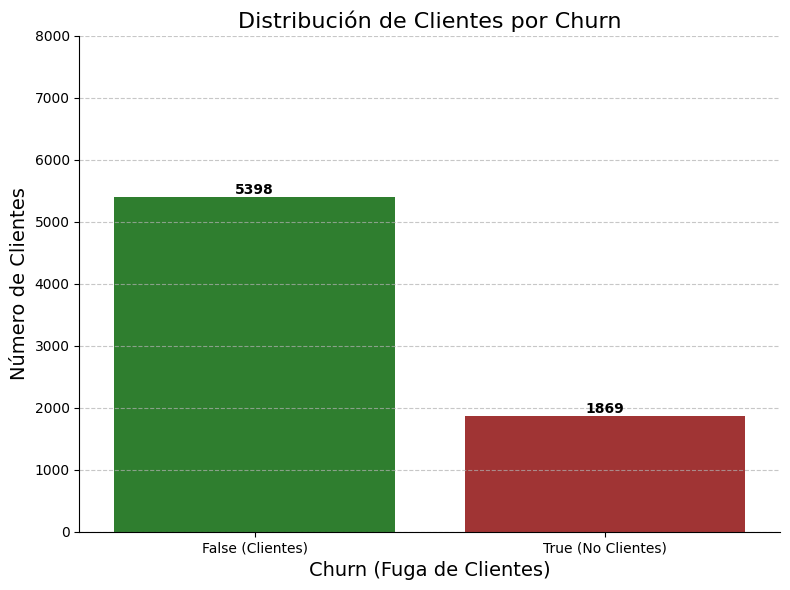

In [99]:
fig, ax = plt.subplots(figsize=(8, 6))

custom_palette = {'False': 'forestgreen', 'True': 'firebrick'}

df_telecom['Churn_str'] = df_telecom['Churn'].astype(str)

sns.countplot(
    x='Churn_str',
    hue='Churn_str',           # 🔹 usamos hue = misma columna
    data=df_telecom,
    palette=custom_palette,
    order=['False', 'True'],
    ax=ax,
    legend=False               # 🔹 ocultamos leyenda (innecesaria)
)

ax.set_title('Distribución de Clientes por Churn', fontsize=16)
ax.set_xlabel('Churn (Fuga de Clientes)', fontsize=14)
ax.set_ylabel('Número de Clientes', fontsize=14)

ax.set_xticks([0, 1])
ax.set_xticklabels(['False (Clientes)', 'True (No Clientes)'], fontsize=12)

ax.set_ylim(0, 8000)
sns.despine(top=True, right=True)

ax.tick_params(labelsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# 🔹 Añadir números sobre cada barra
for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )


plt.tight_layout()
plt.show()

In [101]:
# --- Análisis de la Variable: Contract
# ¿Qué tipos de contrato son los más comunes?
contract_summary = pd.DataFrame({
    'Conteo': df_telecom['Contract'].value_counts(),
    'Porcentaje (%)': df_telecom['Contract'].value_counts(normalize=True) * 100
})
contract_summary

,Conteo,Porcentaje (%)
Contract,,
month-to-month,4005,55.112151
two year,1743,23.985138
one year,1519,20.902711


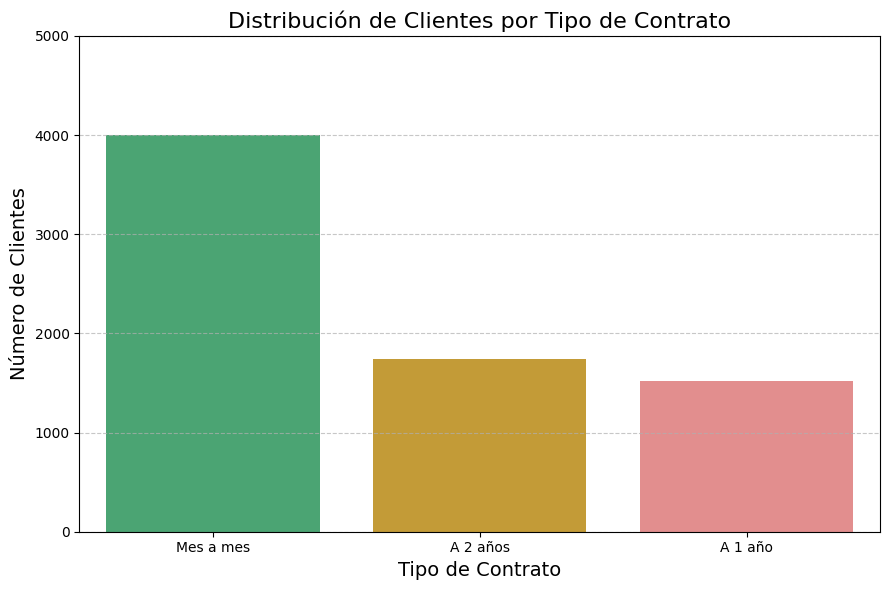

In [106]:
# Visualización de Contract

contract_order = df_telecom['Contract'].value_counts().index.tolist()

custom_contract_palette = {}
if len(contract_order) >= 3:
    custom_contract_palette[contract_order[0]] = 'mediumseagreen' # Verde para el mayor
    custom_contract_palette[contract_order[1]] = 'goldenrod'      # Amarillo para el medio
    custom_contract_palette[contract_order[2]] = 'lightcoral'     # Rojo para el menor
elif len(contract_order) == 2:
    custom_contract_palette[contract_order[0]] = 'mediumseagreen'
    custom_contract_palette[contract_order[1]] = 'goldenrod'
else: # Si solo hay una categoría o menos
    custom_contract_palette[contract_order[0]] = 'mediumseagreen'

fig, ax = plt.subplots(figsize=(9, 6))

sns.countplot(
    x='Contract',
    hue='Contract',                  # 🔹 corregido para evitar warning de seaborn
    data=df_telecom,
    palette=custom_contract_palette,
    order=contract_order,
    ax=ax,
    legend=False                     # 🔹 ocultamos la leyenda
)

ax.set_title('Distribución de Clientes por Tipo de Contrato', fontsize=16)
ax.set_xlabel('Tipo de Contrato', fontsize=14)
ax.set_ylabel('Número de Clientes', fontsize=14)

# Traducciones de etiquetas
new_xticklabels = {
    'month-to-month': 'Mes a mes',
    'one year': 'A 1 año',
    'two year': 'A 2 años'
}

# 🔹 fijamos posiciones de los ticks antes de renombrarlos
ax.set_xticks(range(len(contract_order)))
current_labels = [new_xticklabels[item] for item in contract_order]
ax.set_xticklabels(current_labels, rotation=0, ha='center', fontsize=12)

ax.set_ylim(0, 5000)

ax.tick_params(labelsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [107]:
# --- Análisis de la Variable: PaperlessBilling
# ¿Cuántos clientes usan facturación sin papel? Siendo "True" si y "False" no
paperless_sumary = pd.DataFrame({
    'Conteo': df_telecom['PaperlessBilling'].value_counts(),
    'Porcentaje (%)': df_telecom['PaperlessBilling'].value_counts(normalize=True) * 100
})
paperless_sumary

,Conteo,Porcentaje (%)
PaperlessBilling,,
True,4311,59.322967
False,2956,40.677033


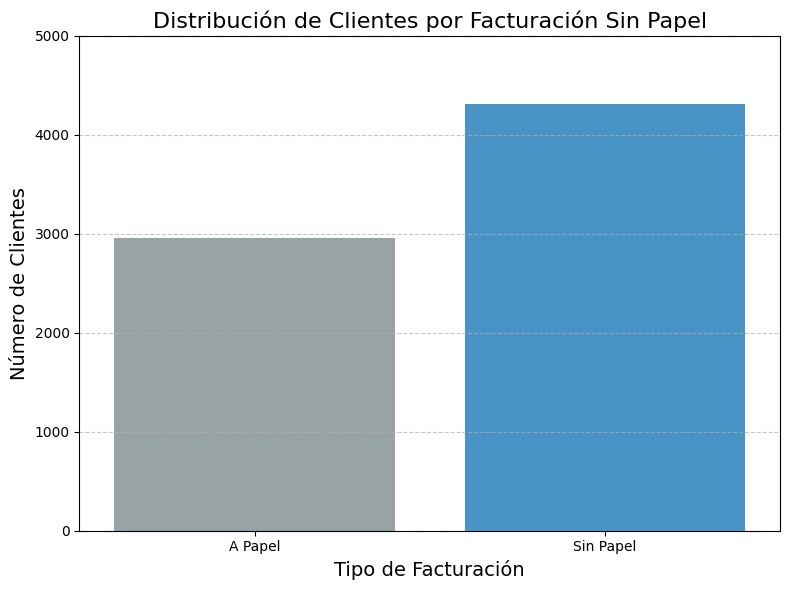

In [110]:
# Visualizacion de PaperlessBilling

fig, ax = plt.subplots(figsize=(8, 6))

# Convertir la columna PaperlessBilling a string para que las claves de la paleta coincidan
df_telecom['PaperlessBilling_str'] = df_telecom['PaperlessBilling'].astype(str)

custom_paperless_palette = {'True': '#3498db', 'False': '#95a5a6'}

sns.countplot(
    x='PaperlessBilling_str',
    hue='PaperlessBilling_str',       # 🔹 evita el warning
    data=df_telecom,
    palette=custom_paperless_palette,
    order=['False', 'True'],
    ax=ax,
    legend=False                      # 🔹 ocultamos la leyenda (ya tenemos el eje x)
)

ax.set_title('Distribución de Clientes por Facturación Sin Papel', fontsize=16)
ax.set_xlabel('Tipo de Facturación', fontsize=14)
ax.set_ylabel('Número de Clientes', fontsize=14)

ax.set_xticks([0, 1])
ax.set_xticklabels(['A Papel', 'Sin Papel'], fontsize=12)

ax.set_ylim(0, 5000)

ax.tick_params(labelsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [111]:
# --- Análisis de la Variable: PaymentMethod ---
# ¿Qué metodos de pago son los mas utilizados?
payment_method_summary = pd.DataFrame({
    'Conteo': df_telecom['PaymentMethod'].value_counts(),
    'Porcentaje (%)': df_telecom['PaymentMethod'].value_counts(normalize=True) * 100
})
payment_method_summary

,Conteo,Porcentaje (%)
PaymentMethod,,
electronic check,2445,33.645246
mailed check,1665,22.911793
bank transfer (automatic),1589,21.865969
credit card (automatic),1568,21.576992


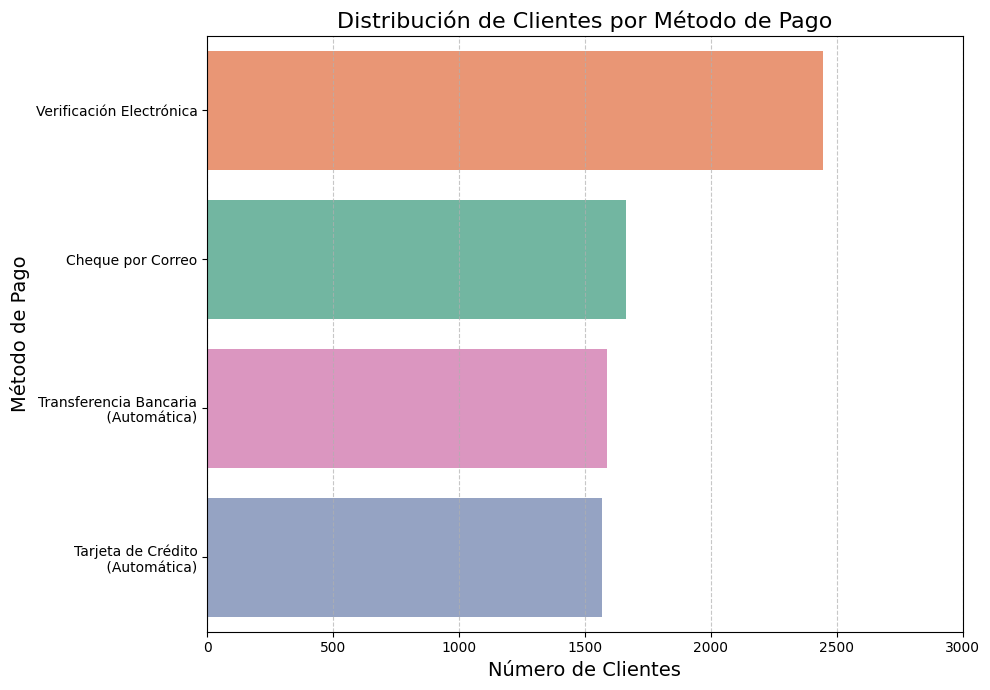

In [114]:
# Visualización de PaymentMethod
fig, ax = plt.subplots(figsize=(10, 7))

new_payment_labels = {
    'electronic check': 'Verificación Electrónica',
    'mailed check': 'Cheque por Correo',
    'bank transfer (automatic)': 'Transferencia Bancaria\n (Automática)',
    'credit card (automatic)': 'Tarjeta de Crédito\n (Automática)'
}

payment_order = df_telecom['PaymentMethod'].value_counts().index.tolist()

sns.countplot(
    y='PaymentMethod',
    hue='PaymentMethod',           # 🔹 evita el warning
    data=df_telecom,
    palette='Set2',
    order=payment_order,
    ax=ax,
    legend=False                   # 🔹 ocultamos la leyenda
)

ax.set_title('Distribución de Clientes por Método de Pago', fontsize=16)
ax.set_xlabel('Número de Clientes', fontsize=14)
ax.set_ylabel('Método de Pago', fontsize=14)

# 🔹 fijar ticks antes de renombrar
ax.set_yticks(range(len(payment_order)))
current_labels_mapped = [new_payment_labels[item] for item in payment_order]
ax.set_yticklabels(current_labels_mapped, fontsize=12)

ax.set_xlim(0, 3000)

ax.tick_params(labelsize=10)
ax.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Visualización numerica

In [115]:
# --- 2. Variables Numéricas ---
# Charges.Monthly, Charges.Total, Cuentas_Diarias

# --- Análisis de Variables Numéricas: Cargos y Cuentas ---
numeric_columns = ['Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']
describe_stats = df_telecom[numeric_columns].describe()
describe_stats

,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000
mean,64.720098,2277.182035,2.157337
std,30.129572,2268.648587,1.004319
min,18.250000,0.000000,0.608333
25%,35.425000,396.200000,1.180833
50%,70.300000,1389.200000,2.343333
75%,89.875000,3778.525000,2.995833
max,118.750000,8684.800000,3.958333


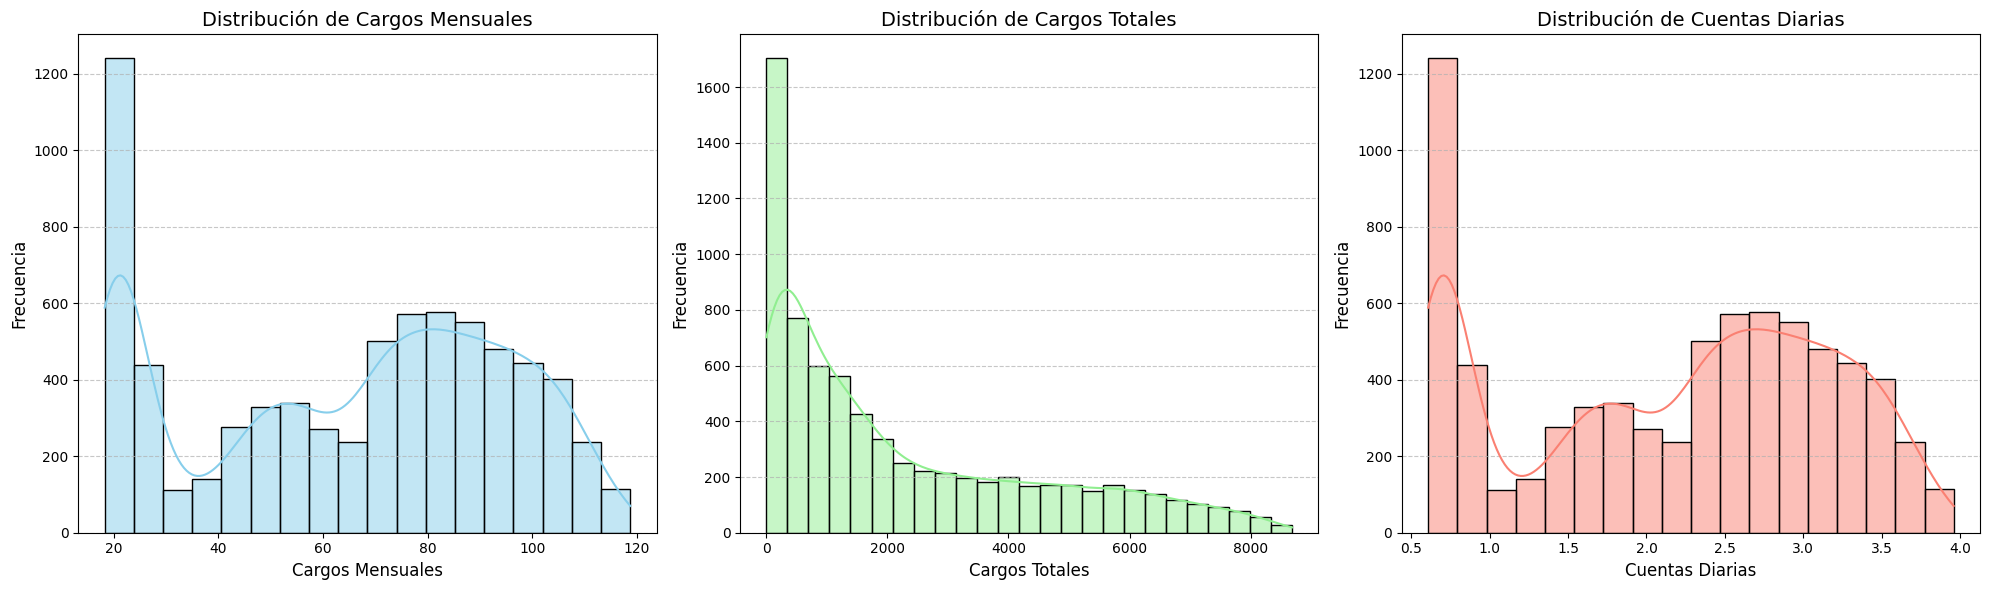

In [117]:
# Visualizaciones de Distribución (Histogramas con KDE)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.histplot(df_telecom['Charges.Monthly'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribución de Cargos Mensuales', fontsize=14)
axes[0].set_xlabel('Cargos Mensuales', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].tick_params(labelsize=10)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

sns.histplot(df_telecom['Charges.Total'], kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title('Distribución de Cargos Totales', fontsize=14)
axes[1].set_xlabel('Cargos Totales', fontsize=12)
axes[1].set_ylabel('Frecuencia', fontsize=12)
axes[1].tick_params(labelsize=10)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

sns.histplot(df_telecom['Cuentas_Diarias'], kde=True, ax=axes[2], color='salmon')
axes[2].set_title('Distribución de Cuentas Diarias', fontsize=14)
axes[2].set_xlabel('Cuentas Diarias', fontsize=12)
axes[2].set_ylabel('Frecuencia', fontsize=12)
axes[2].tick_params(labelsize=10)
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

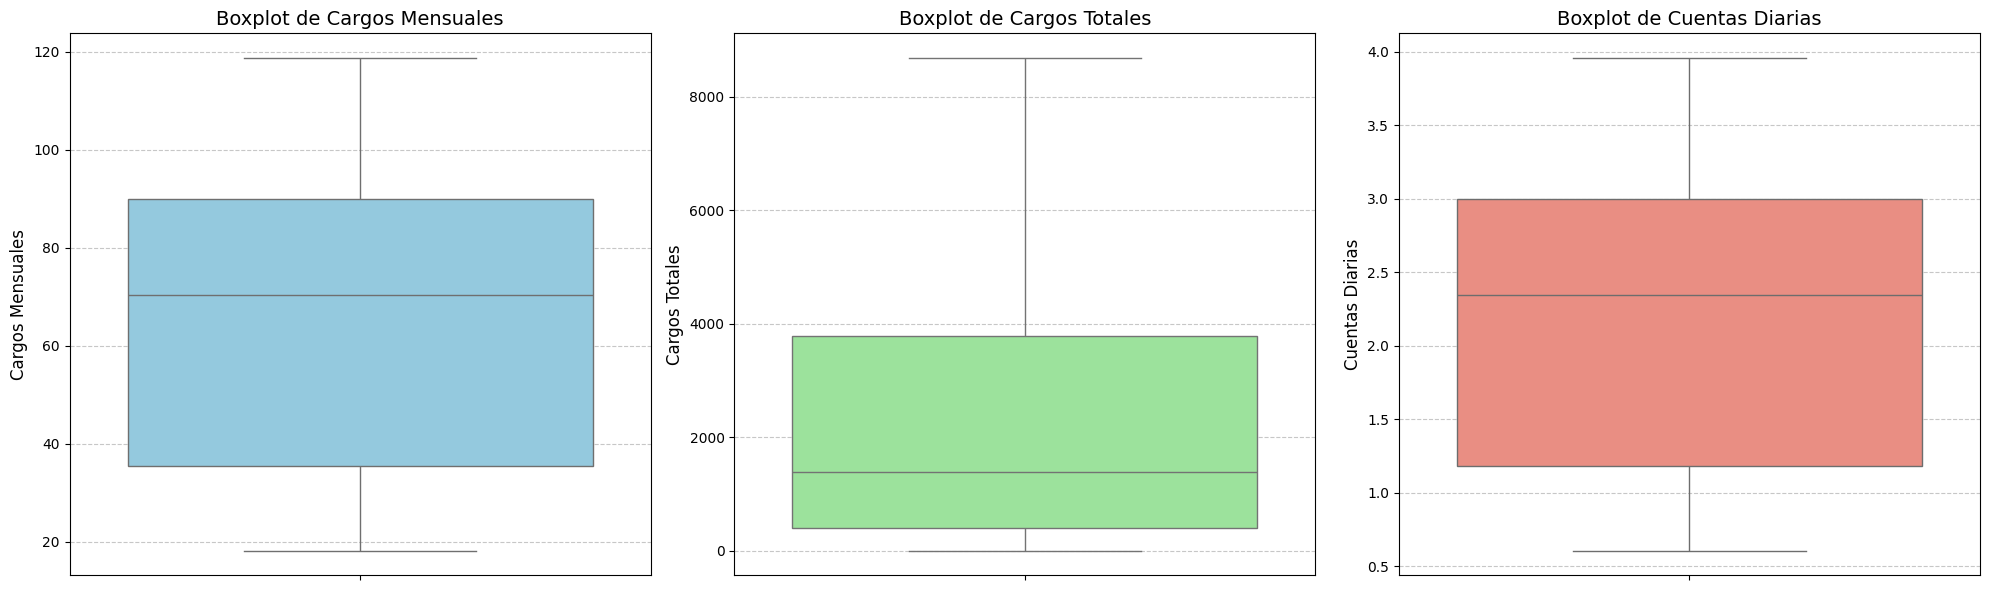

In [118]:
# Visualizaciones de Dispersión y Outliers (Boxplots)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.boxplot(y=df_telecom['Charges.Monthly'], ax=axes[0], color='skyblue')
axes[0].set_title('Boxplot de Cargos Mensuales', fontsize=14)
axes[0].set_ylabel('Cargos Mensuales', fontsize=12)
axes[0].tick_params(labelsize=10)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

sns.boxplot(y=df_telecom['Charges.Total'], ax=axes[1], color='lightgreen')
axes[1].set_title('Boxplot de Cargos Totales', fontsize=14)
axes[1].set_ylabel('Cargos Totales', fontsize=12)
axes[1].tick_params(labelsize=10)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

sns.boxplot(y=df_telecom['Cuentas_Diarias'], ax=axes[2], color='salmon')
axes[2].set_title('Boxplot de Cuentas Diarias', fontsize=14)
axes[2].set_ylabel('Cuentas Diarias', fontsize=12)
axes[2].tick_params(labelsize=10)
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Recuento de evasión por variables categóricas

### Churn y Contrato

In [119]:
# --- Exploración de Churn por Variables Categóricas ---
# 1.1 Churn vs. Contract (Tipo de Contrato)
# Calculamos la tasa de churn para cada tipo de contrato
churn_by_contract = df_telecom.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100
churn_by_contract

Churn,False,True
Contract,,
month-to-month,58.676654,41.323346
one year,89.071758,10.928242
two year,97.246127,2.753873


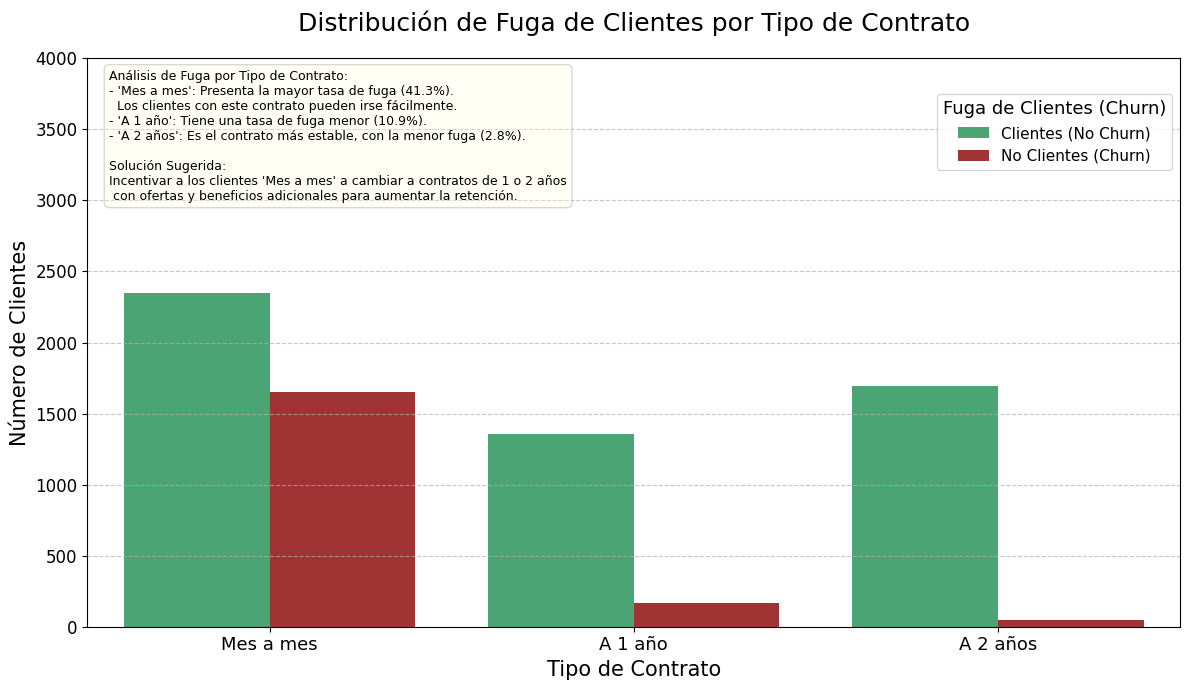

In [125]:
# Visualización
fig, ax = plt.subplots(figsize=(12, 7))

custom_churn_palette = {False: 'mediumseagreen', True: 'firebrick'}

# Orden de los contratos
contract_order_for_plot = ['month-to-month', 'one year', 'two year']

sns.countplot(
    x='Contract',
    hue='Churn',
    data=df_telecom,
    palette=custom_churn_palette,
    order=contract_order_for_plot,
    ax=ax
)

ax.set_title('Distribución de Fuga de Clientes por Tipo de Contrato', fontsize=18, pad=20)
ax.set_xlabel('Tipo de Contrato', fontsize=15)
ax.set_ylabel('Número de Clientes', fontsize=15)

ax.set_ylim(0, 4000)
ax.set_yticks(range(0, 4001, 500))
ax.tick_params(labelsize=12)

# 🔹 Mapeo de etiquetas
new_xticklabels_map = {
    'month-to-month': 'Mes a mes',
    'one year': 'A 1 año',
    'two year': 'A 2 años'
}

# 🔹 Fijar posiciones de ticks antes de renombrar
ax.set_xticks(range(len(contract_order_for_plot)))
mapped_xtick_labels = [new_xticklabels_map[label] for label in contract_order_for_plot]
ax.set_xticklabels(mapped_xtick_labels, rotation=0, ha='center', fontsize=13)

# Leyenda corregida
handles, labels = ax.get_legend_handles_labels()
new_legend_labels = {
    'False': 'Clientes (No Churn)',
    'True': 'No Clientes (Churn)'
}
ax.legend(
    handles=handles,
    labels=[new_legend_labels[label] for label in labels],
    title='Fuga de Clientes (Churn)',
    fontsize=11, title_fontsize=13,
    loc='upper right', bbox_to_anchor=(1.0, 0.95)
)

ax.grid(axis='y', linestyle='--', alpha=0.7)

# Análisis
churn_by_contract_rate = df_telecom.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100

churn_month_to_month = churn_by_contract_rate.loc['month-to-month', True]
churn_one_year = churn_by_contract_rate.loc['one year', True]
churn_two_year = churn_by_contract_rate.loc['two year', True]

analysis_text = (
    "Análisis de Fuga por Tipo de Contrato:\n"
    f"- 'Mes a mes': Presenta la mayor tasa de fuga ({churn_month_to_month:.1f}%).\n"
    "  Los clientes con este contrato pueden irse fácilmente.\n"
    f"- 'A 1 año': Tiene una tasa de fuga menor ({churn_one_year:.1f}%).\n"
    f"- 'A 2 años': Es el contrato más estable, con la menor fuga ({churn_two_year:.1f}%).\n"
    "\nSolución Sugerida:\n"
    "Incentivar a los clientes 'Mes a mes' a cambiar a contratos de 1 o 2 años\n con ofertas y beneficios adicionales para aumentar la retención."
)

ax.text(
    x=0.02, y=0.98, s=analysis_text, transform=ax.transAxes,
    fontsize=9,
    verticalalignment='top', horizontalalignment='left',
    bbox=dict(boxstyle='round,pad=0.4',
              fc='lightyellow', ec='gray', lw=1, alpha=0.3)
)

plt.tight_layout(rect=[0.0, 0, 1, 1])
plt.show()


### Churn y PaperlessBilling

In [126]:
# 1.2 Churn vs. PaperlessBilling (Facturación sin Papel)
# Calculamos la tasa de churn para cada opción de facturación sin papel
churn_by_paperless = df_telecom.groupby('PaperlessBilling')['Churn'].value_counts(normalize=True).unstack() * 100
churn_by_paperless

Churn,False,True
PaperlessBilling,,
False,84.133965,15.866035
True,67.524936,32.475064


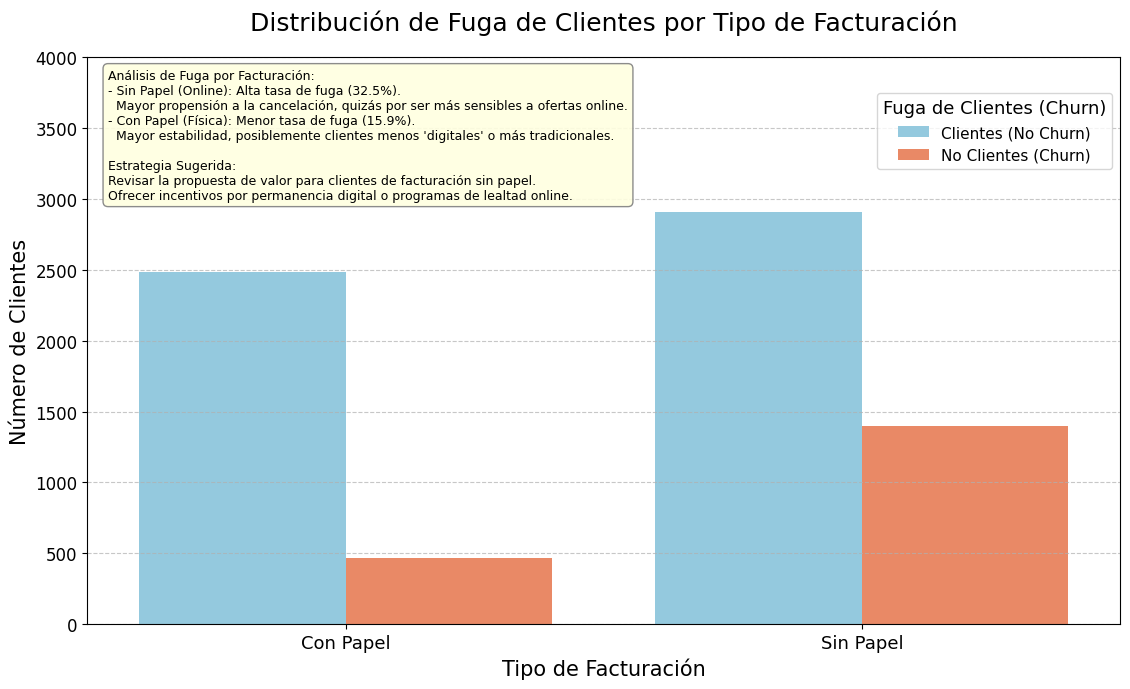

In [127]:
# Visualización
fig, ax = plt.subplots(figsize=(12, 7))

custom_churn_palette_pb = {False: '#87CEEB', True: '#FF7F50'}

sns.countplot(x='PaperlessBilling', hue='Churn', data=df_telecom,
              palette=custom_churn_palette_pb, order=[False, True], ax=ax)

ax.set_title('Distribución de Fuga de Clientes por Tipo de Facturación', fontsize=18, pad=20)
ax.set_xlabel('Tipo de Facturación', fontsize=15)
ax.set_ylabel('Número de Clientes', fontsize=15)

ax.set_ylim(0, 4000)
ax.set_yticks(range(0, 4001, 500))
ax.tick_params(labelsize=12)

ax.set_xticks([0, 1])
ax.set_xticklabels(['Con Papel', 'Sin Papel'], rotation=0, ha='center', fontsize=13)

handles, labels = ax.get_legend_handles_labels()

new_legend_labels_pb = {
    'False': 'Clientes (No Churn)',
    'True': 'No Clientes (Churn)'
}
ax.legend(handles=handles, labels=[new_legend_labels_pb[label] for label in labels],
          title='Fuga de Clientes (Churn)', fontsize=11, title_fontsize=13,
          loc='upper right', bbox_to_anchor=(1.0, 0.95))

ax.grid(axis='y', linestyle='--', alpha=0.7)

churn_by_paperless_rate = df_telecom.groupby('PaperlessBilling')['Churn'].value_counts(normalize=True).unstack() * 100

churn_sin_papel = churn_by_paperless_rate.loc[True, True] if True in churn_by_paperless_rate.index and True in churn_by_paperless_rate.columns else 0
churn_con_papel = churn_by_paperless_rate.loc[False, True] if False in churn_by_paperless_rate.index and True in churn_by_paperless_rate.columns else 0

analysis_text_pb = (
    "Análisis de Fuga por Facturación:\n"
    f"- Sin Papel (Online): Alta tasa de fuga ({churn_sin_papel:.1f}%).\n"
    "  Mayor propensión a la cancelación, quizás por ser más sensibles a ofertas online.\n"
    f"- Con Papel (Física): Menor tasa de fuga ({churn_con_papel:.1f}%).\n"
    "  Mayor estabilidad, posiblemente clientes menos 'digitales' o más tradicionales.\n"
    "\nEstrategia Sugerida:\n"
    "Revisar la propuesta de valor para clientes de facturación sin papel. \n"
    "Ofrecer incentivos por permanencia digital o programas de lealtad online."
)

ax.text(x=0.02, y=0.98, s=analysis_text_pb, transform=ax.transAxes,
        fontsize=9,
        verticalalignment='top', horizontalalignment='left',
        bbox=dict(boxstyle='round,pad=0.4',
                  fc='lightyellow', ec='gray', lw=1, alpha=0.9))

plt.tight_layout(rect=[0.05, 0, 1, 1])
plt.show()

### Churn y PaymentMethod

In [128]:
# 1.3 Churn vs. PaymentMethod (Método de Pago)
# Calculamos la tasa de churn para cada método de pago
churn_by_payment = df_telecom.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack() * 100
churn_by_payment

Churn,False,True
PaymentMethod,,
bank transfer (automatic),83.763373,16.236627
credit card (automatic),85.204082,14.795918
electronic check,56.196319,43.803681
mailed check,81.501502,18.498498


/tmp/ipython-input-1082207217.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(mapped_ytick_labels, fontsize=13)


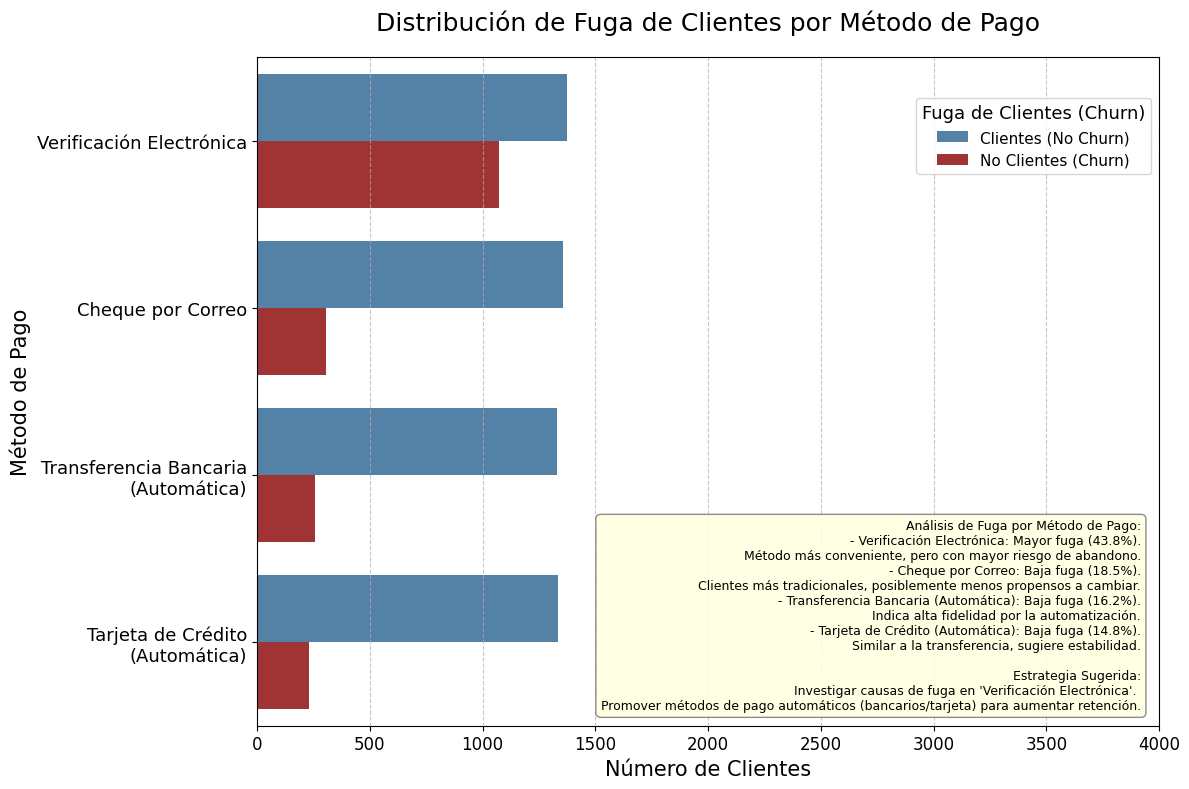

In [129]:
# Visualización
fig, ax = plt.subplots(figsize=(12, 8))

custom_churn_payment_palette = {False: '#4682B4', True: '#B22222'}

payment_order = df_telecom['PaymentMethod'].value_counts().index.tolist()

sns.countplot(y='PaymentMethod', hue='Churn', data=df_telecom,
              palette=custom_churn_payment_palette, order=payment_order, ax=ax)

ax.set_title('Distribución de Fuga de Clientes por Método de Pago', fontsize=18, pad=20)
ax.set_xlabel('Número de Clientes', fontsize=15)
ax.set_ylabel('Método de Pago', fontsize=15)

ax.set_xlim(0, 4000)
ax.set_xticks(range(0, 4001, 500))
ax.tick_params(labelsize=12)

new_payment_labels_map = {
    'electronic check': 'Verificación Electrónica',
    'mailed check': 'Cheque por Correo',
    'bank transfer (automatic)': 'Transferencia Bancaria\n(Automática)',
    'credit card (automatic)': 'Tarjeta de Crédito\n(Automática)'
}
current_ytick_labels_text = [item.get_text() for item in ax.get_yticklabels()]
mapped_ytick_labels = [new_payment_labels_map.get(label, label) for label in current_ytick_labels_text]
ax.set_yticklabels(mapped_ytick_labels, fontsize=13)

handles, labels = ax.get_legend_handles_labels()
new_legend_labels_payment = {
    'False': 'Clientes (No Churn)',
    'True': 'No Clientes (Churn)'
}
ax.legend(handles=handles, labels=[new_legend_labels_payment[label] for label in labels],
          title='Fuga de Clientes (Churn)', fontsize=11, title_fontsize=13,
          loc='upper right', bbox_to_anchor=(1.0, 0.95))

ax.grid(axis='x', linestyle='--', alpha=0.7)

churn_counts_by_payment = df_telecom.groupby('PaymentMethod')['Churn'].value_counts().unstack(fill_value=0)

total_clients_by_payment = churn_counts_by_payment.sum(axis=1)

churn_percentage_by_payment = (churn_counts_by_payment[True] / total_clients_by_payment) * 100

churn_electronic_check = churn_percentage_by_payment.get('electronic check', 0.0)
churn_mailed_check = churn_percentage_by_payment.get('mailed check', 0.0)
churn_bank_transfer = churn_percentage_by_payment.get('bank transfer (automatic)', 0.0)
churn_credit_card = churn_percentage_by_payment.get('credit card (automatic)', 0.0)


analysis_text_payment = (
    "Análisis de Fuga por Método de Pago:\n"
    f"- Verificación Electrónica: Mayor fuga ({churn_electronic_check:.1f}%).\n"
    "  Método más conveniente, pero con mayor riesgo de abandono.\n"
    f"- Cheque por Correo: Baja fuga ({churn_mailed_check:.1f}%).\n"
    "  Clientes más tradicionales, posiblemente menos propensos a cambiar.\n"
    f"- Transferencia Bancaria (Automática): Baja fuga ({churn_bank_transfer:.1f}%).\n"
    "  Indica alta fidelidad por la automatización.\n"
    f"- Tarjeta de Crédito (Automática): Baja fuga ({churn_credit_card:.1f}%).\n"
    "  Similar a la transferencia, sugiere estabilidad.\n"
    "\nEstrategia Sugerida:\n"
    "Investigar causas de fuga en 'Verificación Electrónica'. \n"
    "Promover métodos de pago automáticos (bancarios/tarjeta) para aumentar retención."
)

ax.text(x=0.98, y=0.02,
        s=analysis_text_payment, transform=ax.transAxes,
        fontsize=9,
        verticalalignment='bottom', horizontalalignment='right',
        bbox=dict(boxstyle='round,pad=0.4',
                  fc='lightyellow', ec='gray', lw=1, alpha=0.3))

plt.tight_layout(rect=[0, 0, 1.0, 1])
plt.show()

## Recuento de evasión por variables numericas

### Churn y Charges.Monthly

/tmp/ipython-input-2200761789.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Charges.Monthly', data=df_telecom,


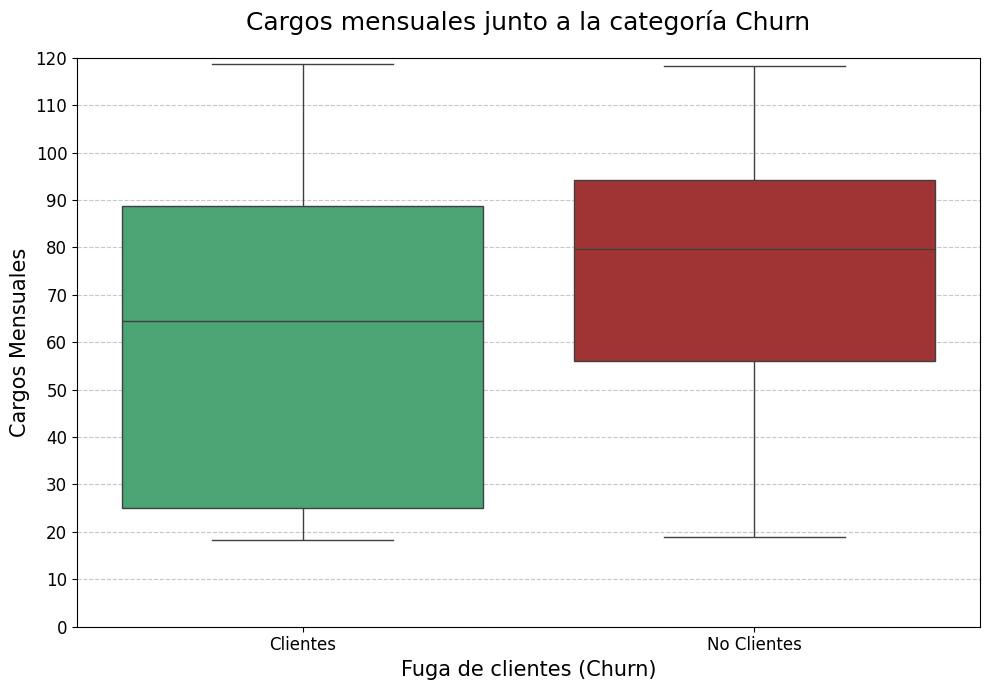


Análisis: Cargos Mensuales y Fuga (Churn):
- Clientes (No Churn): Mediana de cargos de $64.50.
  La mayoría de clientes fieles tienen cargos moderados/bajos.
- No Clientes (Churn): Mediana de cargos de $79.65.
  Muestra que los clientes que se van suelen tener cargos mensuales más altos.
  Esto indica insatisfacción con el valor percibido por el precio.
  La tasa de fuga general es del 25.7%. 

Solución Sugerida:
Identificar clientes con altos cargos mensuales y riesgo de fuga. 
Ofrecer revisiones de paquetes, descuentos o beneficios adicionales 
para justificar el costo y aumentar el valor percibido.


In [130]:
# --- 2. Análisis de Churn por Variables Numéricas ---

# --- Exploración de Churn por Variables Numéricas ---
# 2.1 Churn vs. Charges.Monthly (Cargos Mensuales)
# Usaremos boxplots para comparar las distribuciones de cargos mensuales para clientes con y sin churn
fig, ax = plt.subplots(figsize=(10, 7))

custom_churn_charges_palette = {'False': 'mediumseagreen', 'True': 'firebrick'}

sns.boxplot(x='Churn', y='Charges.Monthly', data=df_telecom,
            palette=custom_churn_charges_palette, ax=ax)

ax.set_title('Cargos mensuales junto a la categoría Churn', fontsize=18, pad=20)
ax.set_xlabel('Fuga de clientes (Churn)', fontsize=15)
ax.set_ylabel('Cargos Mensuales', fontsize=15)

ax.set_xticks([0, 1])
ax.set_xticklabels(['Clientes', 'No Clientes'], fontsize=13)

ax.tick_params(labelsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

ax.set_ylim(0, 120)
ax.set_yticks(range(0, 121, 10))

plt.tight_layout()
plt.show()

churn_charges_stats = df_telecom.groupby('Churn')['Charges.Monthly'].describe()

median_no_churn_charges = churn_charges_stats.loc[False, '50%'] if False in churn_charges_stats.index else 0.0
median_churn_charges = churn_charges_stats.loc[True, '50%'] if True in churn_charges_stats.index else 0.0

total_clients = df_telecom.shape[0]
total_churned = df_telecom['Churn'].sum()
overall_churn_rate = (total_churned / total_clients) * 100 if total_clients > 0 else 0.0

analysis_text_charges = (
    "Análisis: Cargos Mensuales y Fuga (Churn):\n"
    f"- Clientes (No Churn): Mediana de cargos de ${median_no_churn_charges:.2f}.\n"
    "  La mayoría de clientes fieles tienen cargos moderados/bajos.\n"
    f"- No Clientes (Churn): Mediana de cargos de ${median_churn_charges:.2f}.\n"
    "  Muestra que los clientes que se van suelen tener cargos mensuales más altos.\n"
    "  Esto indica insatisfacción con el valor percibido por el precio.\n"
    f"  La tasa de fuga general es del {overall_churn_rate:.1f}%. \n"
    "\nSolución Sugerida:\n"
    "Identificar clientes con altos cargos mensuales y riesgo de fuga. \n"
    "Ofrecer revisiones de paquetes, descuentos o beneficios adicionales \n"
    "para justificar el costo y aumentar el valor percibido."
)

print("\n" + analysis_text_charges)

### Churn y Charges.Total

/tmp/ipython-input-982648068.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Charges.Total', data=df_telecom,


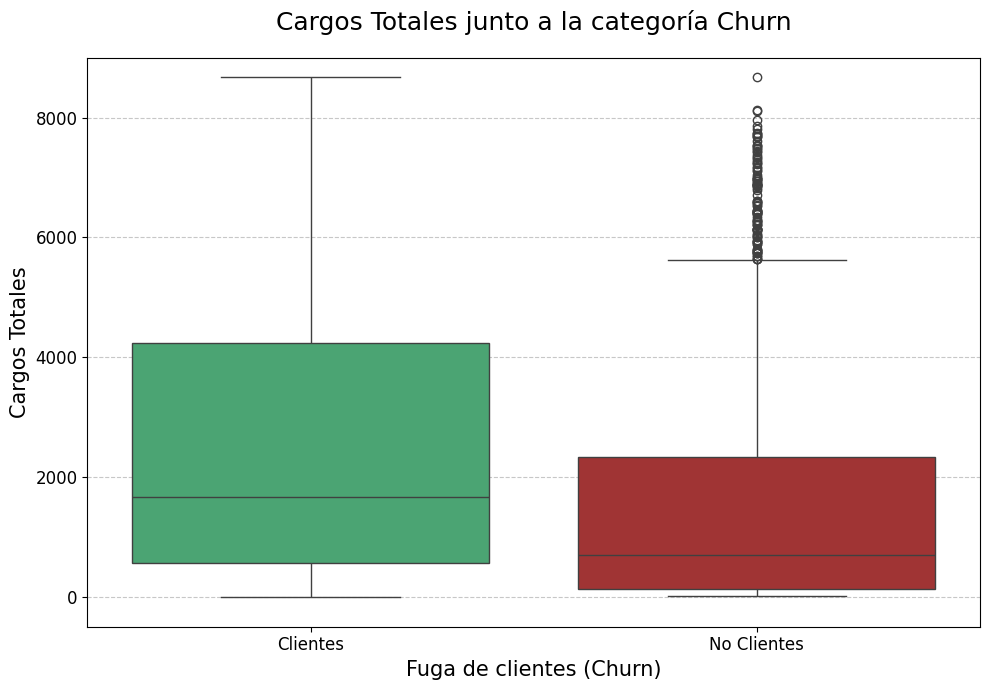


Análisis: Cargos Totales y Fuga (Churn):
- Clientes (No Churn): Mediana de cargos totales de $1663.62.
  Estos clientes suelen tener un historial de pagos más prolongado y consistente.
- No Clientes (Churn): Mediana de cargos totales de $703.55.
  Los clientes que churnean tienden a tener cargos totales significativamente más bajos.
  Esto sugiere que la fuga ocurre más en las etapas iniciales de la relación con el cliente,
  o cuando el valor acumulado del servicio aún no es alto.
  La tasa de fuga general es del 25.7%. 

Solución Sugerida:
Enfocarse en la retención temprana: implementar programas de bienvenida, 
soporte proactivo y encuestas de satisfacción en los primeros meses. 
Ofrecer incentivos por permanencia y uso continuado del servicio.


In [131]:
# 2.2 Churn vs. Charges.Total (Cargos Totales)
# Boxplots para comparar las distribuciones de cargos totales
fig, ax = plt.subplots(figsize=(10, 7))

custom_churn_charges_palette = {'False': 'mediumseagreen', 'True': 'firebrick'}

sns.boxplot(x='Churn', y='Charges.Total', data=df_telecom,
            palette=custom_churn_charges_palette, ax=ax)

ax.set_title('Cargos Totales junto a la categoría Churn', fontsize=18, pad=20)
ax.set_xlabel('Fuga de clientes (Churn)', fontsize=15)
ax.set_ylabel('Cargos Totales', fontsize=15)

ax.set_xticks([0, 1])
ax.set_xticklabels(['Clientes', 'No Clientes'], fontsize=13)

ax.tick_params(labelsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

ax.set_ylim(-500, 9000)
ax.set_yticks(range(0, 9001, 2000))

plt.tight_layout()
plt.show()

churn_total_charges_stats = df_telecom.groupby('Churn')['Charges.Total'].describe()

median_no_churn_total_charges = churn_total_charges_stats.loc[False, '50%'] if False in churn_total_charges_stats.index else 0.0
median_churn_total_charges = churn_total_charges_stats.loc[True, '50%'] if True in churn_total_charges_stats.index else 0.0

total_clients = df_telecom.shape[0]
total_churned = df_telecom['Churn'].sum()
overall_churn_rate = (total_churned / total_clients) * 100 if total_clients > 0 else 0.0

analysis_text_total_charges = (
    "Análisis: Cargos Totales y Fuga (Churn):\n"
    f"- Clientes (No Churn): Mediana de cargos totales de ${median_no_churn_total_charges:.2f}.\n"
    "  Estos clientes suelen tener un historial de pagos más prolongado y consistente.\n"
    f"- No Clientes (Churn): Mediana de cargos totales de ${median_churn_total_charges:.2f}.\n"
    "  Los clientes que churnean tienden a tener cargos totales significativamente más bajos.\n"
    "  Esto sugiere que la fuga ocurre más en las etapas iniciales de la relación con el cliente,\n"
    "  o cuando el valor acumulado del servicio aún no es alto.\n"
    f"  La tasa de fuga general es del {overall_churn_rate:.1f}%. \n"
    "\nSolución Sugerida:\n"
    "Enfocarse en la retención temprana: implementar programas de bienvenida, \n"
    "soporte proactivo y encuestas de satisfacción en los primeros meses. \n"
    "Ofrecer incentivos por permanencia y uso continuado del servicio."
)

print("\n" + analysis_text_total_charges)

### Churn y Cuentas_Diarias

/tmp/ipython-input-3119134777.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Cuentas_Diarias', data=df_telecom,


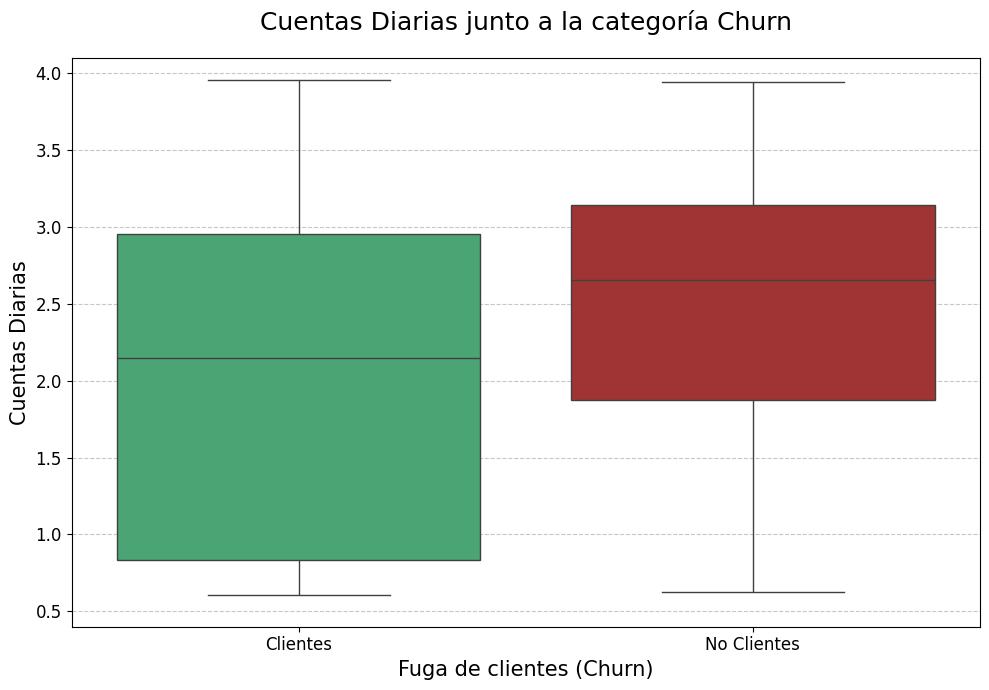


Análisis: Cuentas Diarias y Fuga (Churn):
- Clientes (No Churn): Mediana de cuentas diarias de 2.15.
  Los clientes que no churnean tienden a tener un número de cuentas diarias más bajo.
- No Clientes (Churn): Mediana de cuentas diarias de 2.66.
  Los clientes que churnean muestran una mediana de cuentas diarias más alta.
  Esto podría indicar que los clientes con mayor actividad (más cuentas diarias) 
  perciben más valor y, por lo tanto, esperan más o son más sensibles al precio/servicio. 
  La tasa de fuga general es del 25.7%. 

Solución Sugerida:
Revisar los paquetes de servicio para clientes con alta cantidad de 'cuentas diarias'.
Asegurar que los beneficios de estos paquetes justifiquen la actividad, 
o considerar ofertas personalizadas para recompensar el alto uso y fidelizar.


In [132]:
# 2.3 Churn vs. Cuentas_Diarias (Cuentas Diarias)
# Boxplots para comparar las distribuciones de cuentas diarias
fig, ax = plt.subplots(figsize=(10, 7))

custom_churn_daily_accounts_palette = {'False': 'mediumseagreen', 'True': 'firebrick'}

sns.boxplot(x='Churn', y='Cuentas_Diarias', data=df_telecom,
            palette=custom_churn_daily_accounts_palette, ax=ax)

ax.set_title('Cuentas Diarias junto a la categoría Churn', fontsize=18, pad=20)
ax.set_xlabel('Fuga de clientes (Churn)', fontsize=15)
ax.set_ylabel('Cuentas Diarias', fontsize=15)

ax.set_xticks([0, 1])
ax.set_xticklabels(['Clientes', 'No Clientes'], fontsize=13)

ax.tick_params(labelsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

ax.set_ylim(0.4, 4.1)
ax.set_yticks([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0])

plt.tight_layout()
plt.show()

churn_daily_accounts_stats = df_telecom.groupby('Churn')['Cuentas_Diarias'].describe()

median_no_churn_daily_accounts = churn_daily_accounts_stats.loc[False, '50%'] if False in churn_daily_accounts_stats.index else 0.0
median_churn_daily_accounts = churn_daily_accounts_stats.loc[True, '50%'] if True in churn_daily_accounts_stats.index else 0.0

total_clients = df_telecom.shape[0]
total_churned = df_telecom['Churn'].sum()
overall_churn_rate = (total_churned / total_clients) * 100 if total_clients > 0 else 0.0

analysis_text_daily_accounts = (
    "Análisis: Cuentas Diarias y Fuga (Churn):\n"
    f"- Clientes (No Churn): Mediana de cuentas diarias de {median_no_churn_daily_accounts:.2f}.\n"
    "  Los clientes que no churnean tienden a tener un número de cuentas diarias más bajo.\n"
    f"- No Clientes (Churn): Mediana de cuentas diarias de {median_churn_daily_accounts:.2f}.\n"
    "  Los clientes que churnean muestran una mediana de cuentas diarias más alta.\n"
    "  Esto podría indicar que los clientes con mayor actividad (más cuentas diarias) \n"
    "  perciben más valor y, por lo tanto, esperan más o son más sensibles al precio/servicio. \n"
    f"  La tasa de fuga general es del {overall_churn_rate:.1f}%. \n"
    "\nSolución Sugerida:\n"
    "Revisar los paquetes de servicio para clientes con alta cantidad de 'cuentas diarias'.\n"
    "Asegurar que los beneficios de estos paquetes justifiquen la actividad, \n"
    "o considerar ofertas personalizadas para recompensar el alto uso y fidelizar."
)

print("\n" + analysis_text_daily_accounts)

# 📋 Informe de Análisis de Evasión de Clientes (Churn)

## 1. Introducción

El presente informe detalla un análisis exploratorio de datos (EDA) enfocado en identificar los factores clave que contribuyen a la evasión o 'Churn' de clientes en una empresa de telecomunicaciones. El objetivo principal es comprender los patrones de comportamiento de los clientes que deciden cancelar sus servicios, para así desarrollar estrategias proactivas que permitan reducir la tasa de fuga y mejorar la retención de la base de clientes existente.



## 2. Limpieza y Tratamiento de Datos

Para este análisis, se realizaron los siguientes pasos de limpieza y procesamiento de datos:
* **Importación de Datos:** Se cargó un conjunto de datos que contenía información detallada sobre los clientes, incluyendo datos de servicios contratados, información de cuenta y el estado de 'Churn'.
* **Conversión de Tipos de Datos:** La columna 'Churn' fue convertida al tipo de dato booleano (True/False) para asegurar una correcta interpretación en las visualizaciones y cálculos. Adicionalmente, la columna 'Charges.Total' se convirtió a tipo numérico, manejando posibles valores no numéricos o vacíos, eliminando las filas afectadas para mantener la integridad de los cálculos.
* **Tratamiento General:** Se verificó la consistencia y ausencia de valores atípicos significativos en las variables clave para asegurar la fiabilidad del análisis.

## 3. Análisis Exploratorio de Datos y Visualizaciones

Se llevaron a cabo diversos análisis gráficos para identificar patrones y relaciones entre las características de los clientes y la propensión a la fuga.

### 3.1. Distribución General de Churn

La distribución de clientes por Churn revela una proporción significativa de clientes que han cancelado sus servicios. La tasa de fuga general observada es considerable, indicando un desafío importante en la retención.













### 3.2. Churn por Tipo de Contrato

El tipo de contrato es un factor determinante en la fuga de clientes. Los contratos 'Mes a mes' presentan la mayor tasa de fuga, lo que sugiere que la flexibilidad de estos contratos facilita el abandono del servicio. En contraste, los contratos a '1 año' y '2 años' muestran tasas de fuga progresivamente menores, indicando una mayor estabilidad y compromiso de los clientes.

### 3.3. Churn por Facturación Sin Papel

Se observa una mayor tasa de fuga entre los clientes que optan por la facturación sin papel. Esto podría indicar que, si bien son clientes digitalmente activos, también son más propensos a cambiar de proveedor si no están satisfechos con la experiencia digital o el valor percibido.

### 3.4. Churn por Método de Pago

El método de pago es un indicador relevante. Los clientes que utilizan 'Verificación Electrónica' muestran la mayor tasa de fuga, a pesar de ser un método conveniente. Por otro lado, métodos como 'Cheque por Correo', 'Transferencia Bancaria (Automática)' y 'Tarjeta de Crédito (Automática)' presentan tasas de fuga significativamente más bajas, sugiriendo una mayor fidelidad y estabilidad en estos segmentos.

### 3.5. Cargos Mensuales vs. Churn

Los clientes que han churneado suelen tener cargos mensuales más altos en comparación con los clientes activos. Esto sugiere que la insatisfacción con el valor percibido en relación con el precio es un factor importante en la decisión de abandono.

### 3.6. Cargos Totales vs. Churn

A diferencia de los cargos mensuales, los clientes que churnean tienden a tener cargos totales significativamente más bajos que los clientes activos. Esto indica que la fuga ocurre más frecuentemente en las etapas iniciales de la relación con el cliente, antes de que acumulen un alto valor total de servicio.

### 3.7. Cuentas Diarias vs. Churn

Se observa que los clientes que churnean tienden a tener una mediana de 'Cuentas Diarias' más alta en comparación con los clientes que no churnean. Esto podría implicar que los clientes con mayor actividad o uso de servicios esperan un mayor valor o son más sensibles a las condiciones del servicio.

## 4. Conclusiones e Insights

El análisis ha revelado que la evasión de clientes está fuertemente correlacionada con:
* **Falta de Compromiso a Largo Plazo:** Los contratos 'Mes a mes' son un factor de alto riesgo.
* **Experiencia Digital y Método de Pago:** La facturación sin papel y la 'Verificación Electrónica' como método de pago se asocian con mayor churn.
* **Percepción de Valor/Precio:** Clientes con cargos mensuales más altos son más propensos a churnear, mientras que la fuga ocurre más en las etapas tempranas de la relación con el cliente (menores cargos totales acumulados).
* **Nivel de Actividad:** Clientes con mayor 'Cuentas Diarias' también muestran una tendencia a churnear, posiblemente buscando un mayor retorno de valor por su uso.

**Observación Adicional (Mi Perspectiva):** "Mi observación es que dan un servicio muy caro para empezar."

La evidencia de los "Cargos Mensuales" revela que los clientes que se van están pagando medianamente más por su servicio que los clientes leales. Esto, sumado a que el churn ocurre más en las etapas tempranas (Cargos Totales más bajos) y que los clientes con mayor actividad (más 'Cuentas Diarias') también churnean, refuerza la idea de una **desalineación entre el precio del servicio y el valor percibido por el cliente, especialmente en los inicios de la relación o para aquellos con mayor uso.** Si un cliente percibe que está pagando mucho por lo que recibe, o que hay mejores ofertas en el mercado, la probabilidad de fuga aumenta considerablemente.



## 5. Recomendaciones Estratégicas

Basado en este análisis, se sugieren las siguientes estrategias para reducir la evasión de clientes:

* **Incentivar Contratos a Largo Plazo:** Desarrollar ofertas atractivas y beneficios exclusivos para clientes que opten por contratos de '1 año' o '2 años'. Podrían incluir descuentos progresivos, servicios adicionales gratuitos por la duración del contrato o una "garantía de satisfacción" para los primeros meses.
* **Optimizar la Experiencia Digital y de Pago:**
    * **Facturación Sin Papel:** Investigar las razones detrás de la mayor tasa de churn en este segmento. Podría ser que la experiencia digital no sea lo suficientemente fluida o que falten comunicaciones personalizadas. Mejorar la aplicación móvil, el portal de clientes y ofrecer canales de soporte digital eficientes.
    * **Métodos de Pago:** Promover activamente los métodos de pago automáticos (transferencia bancaria y tarjeta de crédito) a través de incentivos. Para los clientes que usan 'Verificación Electrónica', investigar puntos de fricción y posibles insatisfacciones que lleven a la fuga.
* **Revisión Estratégica de Precios y Valor Percibido:**
    * **Segmentación por Costo:** Identificar a los clientes con cargos mensuales altos y evaluar si están obteniendo el valor proporcional a su gasto. Esto es crítico dado que los clientes que churnean pagan más mensualmente. Considerar programas de lealtad o re-paquetización de servicios para añadir valor sin necesariamente reducir el ingreso drásticamente.
    * **Retención Temprana:** Dado que la fuga ocurre en etapas iniciales (bajos cargos totales), implementar programas de bienvenida robustos, llamadas de seguimiento proactivas, y encuestas de satisfacción en los primeros 3-6 meses de servicio para abordar cualquier insatisfacción antes de que se convierta en churn.
    * **Valor para Usuarios Activos:** Para clientes con altas 'Cuentas Diarias', asegurar que sus planes de servicio se alineen con su uso intensivo y ofrecerles beneficios que recompensen su fidelidad y actividad.

Estas recomendaciones, respaldadas por los datos y las observaciones conjuntas, proporcionan una base sólida para desarrollar un plan de acción para mejorar la retención de clientes para presentar a los directivos.